<div align="center">

# ΠΑΝΕΠΙΣΤΗΜΙΟ ΚΡΗΤΗΣ
# Τμήμα Επιστήμης Υπολογιστών

## HY-215: Εφαρμοσμένα Μαθηματικά για Μηχανικούς
## Εαρινό Εξάμηνο 2022-2023
### Διδάσκοντες: Γ. Στυλιανού, Γ. Καφεντζής

## Ανάθεση: 19-3-2023
## Παράδοση (ηλεκτρονικά, όπως αναφέρεται στην ιστοσελίδα του μαθήματος):
## Σάββατο, 31-3-2023, 23:59:59
<h1><center>Άσκηση 2 [Υποχρεωτική]</center></h1>

In [1]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from ctft import  ctft
import numpy as np
import IPython
%matplotlib inline

Ο μετασχηματισμός Fourier είναι ένα **ασύλληπτα** χρήσιμο εργαλείο σε πολλού τομείς της Επεξεργασίας Σήματος. 

Ένας τέτοιος τομέας είναι η **ανίχνευση παθολογίας φωνής**.


Ηχογραφήστε τη φωνή σας όταν εκφέρετε το φώνημα /α/, σταθερά, για περίπου $3$ δευτερόλεπτα. Φροντίστε να βρίσκεστε σε ήσυχο περιβάλλον, και προσπαθήστε (αν γίνεται) να χρησιμοποιήσετε κανονικό μικρόφωνο (αλλιώς, χρησιμοποιήστε τα ενσωματωμένα των laptops σας). 

Χρησιμοποιήστε ένα πρόγραμμα ηχογράφησης της επιλογής σας (π.χ. το δωρεάν πρόγραμμα Wavesurfer ή το Audacity) και φροντίστε η ηχογράφηση να είναι μονοφωνική (δηλ. όχι στέρεο - δικαναλική) και να γίνει σε συχνότητα δειγματοληψίας $16000$ Hz, και ακρίβεια αποθήκευσης $16$ bits σε μορφή $\texttt{.wav}$. 

**Σας δίνεται και ένα ενδεικτικό σήμα στο site του μαθήματος, αν δεν μπορέσετε να πραγματοποιήσετε τα παραπάνω.**

---
---

## Άσκηση:

Χρησιμοποιήστε τον κώδικα ανάλυσης μετασχηματισμού Fourier που σας δόθηκε στην προηγούμενη άσκηση $\texttt{Python}$ (και για ευκολία, σας δίνεται στο αρχείο $\texttt{CTFT.py}$ στο site του μαθήματος) για να αναλύσετε το σήμα όπως περιγράφεται παρακάτω:

* Ας φορτώσουμε κι ακούσουμε την ηχογράφησή μας.

In [2]:
Fs, s = wav.read('alpha.wav')  # Φορτώστε το σήμα (alpha.wav ή όπως ονομάσατε αυτό που ηχογραφήσατε)
s = s / np.abs(np.max(s))      # Κανονικοποιήστε τα πλάτη στο [-1, 1]

# Δείτε πόσα δείγματα της φωνής μας περιέχονται στο διάνυσμα s!
print(f"Το σήμα μας περιέχει {s.shape[0]} το πλήθος δείγματα και έχει διάρκεια {s.shape[0]/Fs} sec!")

IPython.display.Audio("alpha.wav")  # Ας το ακούσουμε!

Το σήμα μας περιέχει 41504 το πλήθος δείγματα και έχει διάρκεια 2.594 sec!


* Επιλέξτε ένα τμήμα (ή, όπως λέμε στην ορολογία της Επεξεργασίας Σήματος, ένα **παράθυρο**) φωνής, με διάρκεια περίπου $50$ ms, κατά προτίμηση από τη μέση περίπου της ηχογράφησης. Στην Python, αυτό μπορεί να γίνει ως:

Text(0, 0.5, 'Πλάτος')

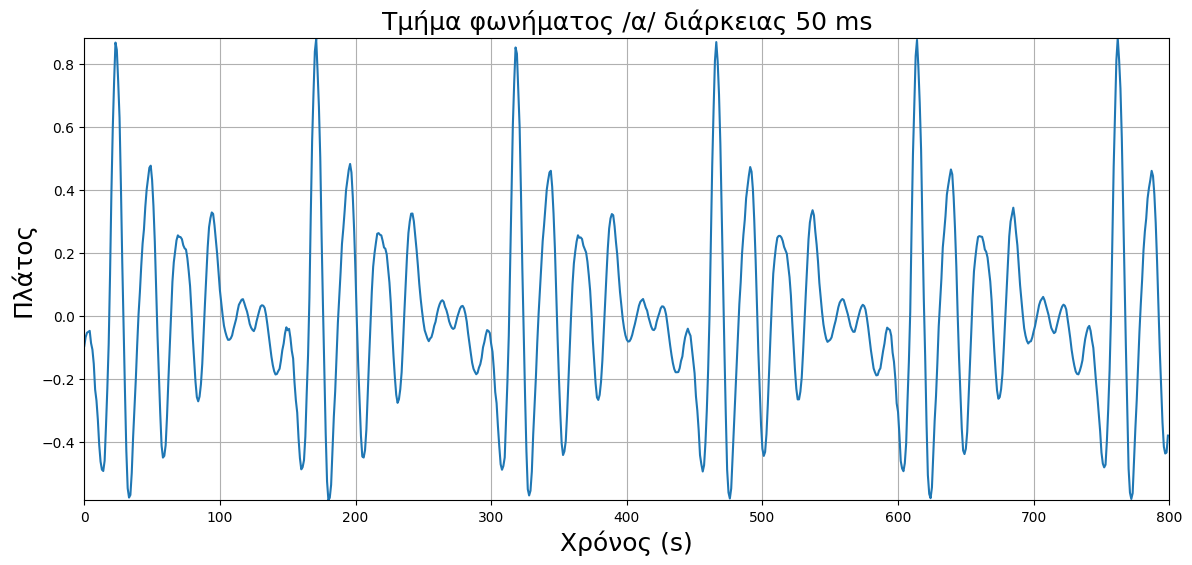

In [3]:
start = 1                      # Έστω ότι το τμήμα μας αρχίζει στο 1 sec
finish = 1.05                  # ...και τελειώνει μετά από 0.05 sec

start_s = round(start*Fs)      # Mετατρέπουμε την αρχή σε δείγματα
finish_s = round(finish*Fs)    # Μετατρέπουμε το τέλος σε δείγματα

segment = s[start_s:finish_s]  # "Κόβουμε"/απομονώνουμε το τμήμα που μας ενδιαφέρει από το αρχικό σήμα s

plt.figure(figsize=(14,6))     # Οπτικοποίηση
plt.plot(segment)              
plt.xlim([0, len(segment)])
plt.ylim([min(segment), max(segment)])
plt.grid()
plt.title('Τμήμα φωνήματος /α/ διάρκειας 50 ms', fontsize=18)
plt.xlabel("Χρόνος (s)", fontsize=18)
plt.ylabel("Πλάτος", fontsize=18)

* Στη μεταβλητή $\texttt{segment}$ έχετε ένα τμήμα της φωνής σας διάρκειας $50$ ms. Χρησιμοποιήστε τον κώδικα ανάλυσης Fourier (συνάρτηση $\texttt{CTFT.py}$) για να αναλύσετε το σήμα σας στην περιοχή συχνοτήτων από $2000$ ως $4000$ Hz και να βρείτε το μετασχηματισμό Fourier και να απεικονίστε γραφικά το φάσμα πλάτους και το φάσμα φάσης. H προαναφερθείσα συνάρτηση δέχεται τρια ορίσματα:

1. Το σήμα ομιλίας
2. Τον άξονα του χρόνου (σας δίνεται παρακάτω)
3. Τον άξονα της συχνότητας (πρέπει να τον κατασκευάσετε εσείς)

* Στον κώδικα ανάλυσης, χρησιμοποιήστε μικρό βήμα στη συχνότητα, της τάξης του $0.1$ Hz, όπως σας δίνεται:

In [4]:
Df = 0.1                    # Βήμα στη συχνότητα
f = np.arange(start=2000, stop=4000, step=Df)   # Κατασκευάστε τον άξονα συχνοτήτων από 2000 ως 4000 Hz (χρησιμοποιήστε τη συνάρτηση np.arange)

* Αν το φάσμα πλάτους που θα δείτε, παρουσιάσει μια συμμετρία ως προς τη συχνότητα $3000$ Hz, τότε υπάρχει μια πιθανότητα $20\%$ να αναπτύξετε ασθένεια στο φάρυγγά σας τα επόμενα $5$ χρόνια. Προσέξτε λοιπόν να κάνετε σωστά την ανάλυση! :)

## Απάντηση:

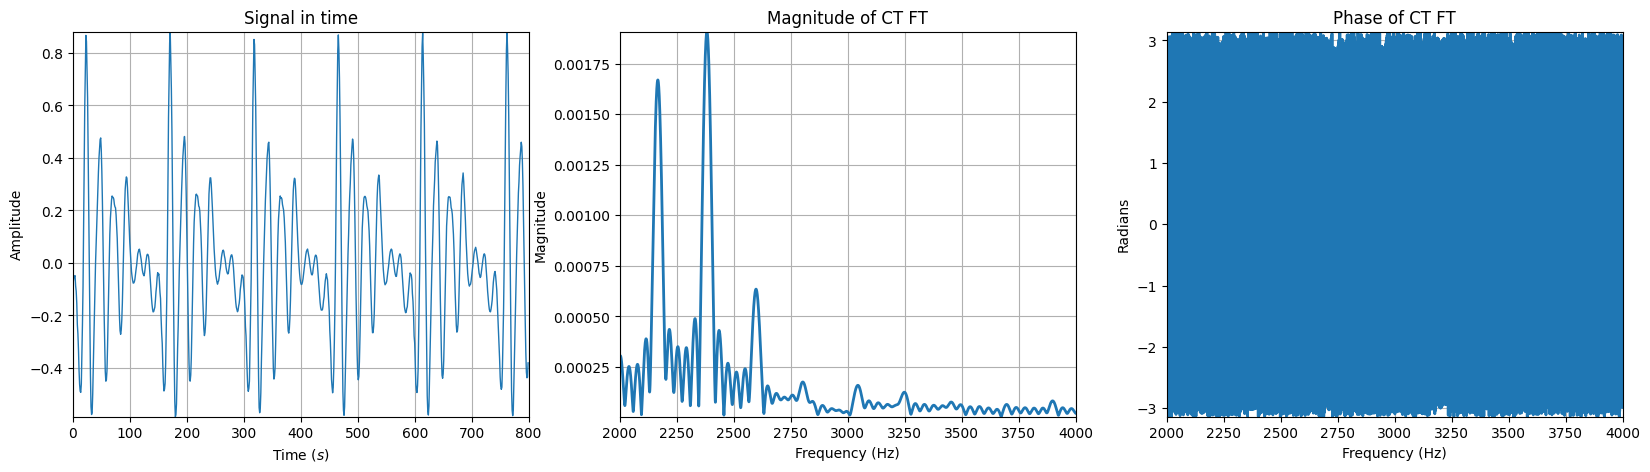

In [5]:
t = np.arange(start=start_s, stop=finish_s, step=1)/Fs   # άξονας χρόνου
X, absX, angX = ctft(segment, t, f, True)

Αν τα κάνετε όλα σωστά, θα πάρετε το παρακάτω σχήμα (για το σήμα $\texttt{alpha.wav}$ που σας δίνεται - αν βάλετε ένα δικό σας θα έχετε διαφορετικό αποτέλεσμα):

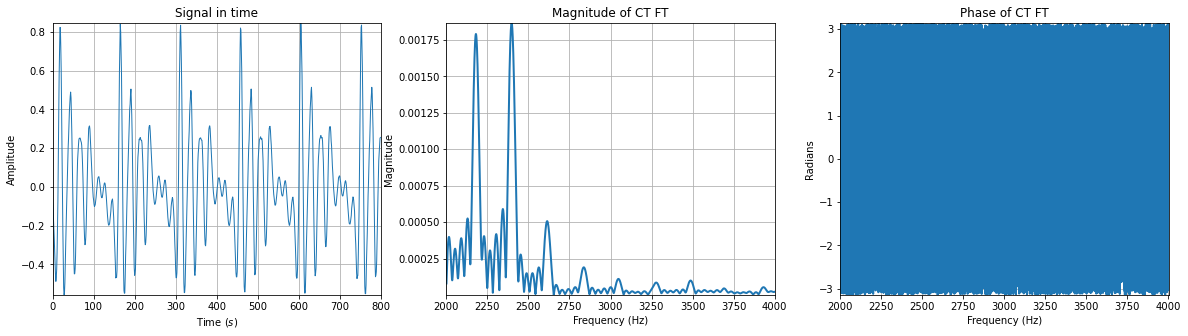

Παρατηρούμε ότι δεν υπάρχει συμμετρία γύρω από τα $3000$ Hz (για το δικό μας σήμα - για το δικό σας? :) )

### ΠΡΟΣΟΧΗ: Το παραδοτέο αρχείο σας πρέπει να έχει όλα τα κελιά εκτελεσμένα! 

### Τρέξτε κάθε κελί του αρχείου, σώστε το, και καταθέστε το με τον τρόπο που περιγράφεται στην ιστοσελίδα.